# Proyecto Final :  EDA

1.- Este Notebook contiene un analisis exploratorio de los datos en nuestro Data Set

### Proyecto de Nlp: Juan Carlos Guanoluisa

In [2]:
# Fecha Maxima de Entrega: Febrero 20/2022

# Para esto vamos primero a importar las librerias que vamos a usar en este notenook

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import string
from stop_words import get_stop_words
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import unicodedata
from num2words import num2words

%matplotlib inline 
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [ ]:
# Vamos a usar la libreria nltk para realizar algunas actividades aprovechando que nuestros datos estan en ingles.
# Y cargamos las librerias NLTK

In [2]:
#import nltk
#nltk.download()

In [3]:
# Definimos una funcion para cargar los datos, en este caso nuestro data Set de Reviews de musica de Amazon

def load_data_reviews(corpus_file):
    df_corpus = pd.read_json(corpus_file, lines=True)
    df_corpus = df_corpus.drop(['reviewerID', 'asin', 'helpful', 'unixReviewTime', 'reviewTime'], axis=1)
    df_corpus.rename(columns={'overall': 'sentimiento'}, inplace=True)    
    return df_corpus

In [4]:
# Claro. el DataSet, fue previamente descargado y subido a nuestro de Jupyter Lab
df = load_data_reviews('Digital_Music_5.json')

In [5]:
# Aqui desplegamos solo las 4 columnas mas relevantes para el analisis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64706 entries, 0 to 64705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewerName  64529 non-null  object
 1   reviewText    64706 non-null  object
 2   sentimiento   64706 non-null  int64 
 3   summary       64706 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
df.head()

reviewerName                                         reviewText  \
0  Amaranth "music fan"  It's hard to believe "Memory of Trees" came ou...   
1             bethtexas  A clasically-styled and introverted album, Mem...   
2           bob turnley  I never thought Enya would reach the sublime h...   
3                 Calle  This is the third review of an irish album I w...   
4           Cloud "..."  Enya, despite being a successful recording art...   

   sentimiento                       summary  
0            5       Enya's last great album  
1            5      Enya at her most elegant  
2            5               The best so far  
3            5  Ireland produces good music.  
4            4        4.5; music to dream to

In [7]:
# Aqui desplegamos la longitud de nuestro data set
len(df)

64706

### Generamos una funcion para armar nuestro Corpus de todos los reviews de nuestro DataSet

In [17]:
# Funcion para propocesar nuestros datos del Data Set para armar algunas cosas
# 1.- Nuestro Corpus
# 2.- Limpieza del Corpus
# 3.- Estandarizacion y creacion de las Etiquetas
# 4.- Transformar todo a minusculas
# 5.- Lematizamos nuestro Corpus

def crearCorpus(df):
    porter = PorterStemmer()
    df["caliSentimiento"] = 0
    
    # Cargamos cada review text eliminando los signos de puntuacion
    tabla = str.maketrans('', '', string.punctuation)
    # Definimos la variable donde vamos a almacenar todo el corpus
    corpus = ""
    for i in df.index:
        
        #corpus = corpus + ' '+ review
        txt = df.at[i,"reviewText"].strip()
        txt = txt.replace('.', ' ')
        txt = txt.replace(',', ' ')
        txt = txt.replace(';', ' ')
        txt = txt.replace('&', ' ')
        review = ' '.join([word.translate(tabla) for word in txt.split()])
        
        review = review.strip().lower()
        processed_text = " "
        palabras = review.split()
        for palabra in palabras:
            palabra = porter.stem(palabra)
            if palabra.isdigit():
                 palabra = num2words(palabra, lang='en')
            processed_text = processed_text +" "+ palabra
            
        corpus = corpus + processed_text
        # aniadiamos una columna mas para calificar el sentimiento positivo o negativo\n",
        if df.at[i,"sentimiento"] > 2:
            df.at[i,"caliSentimiento"] = 1
        else:
            df.at[i,"caliSentimiento"] = 0
            
        #corpus = corpus + review.strip().lower()
        #if i == 1000:
        #    break
    return corpus.strip()

In [18]:
# Ejecutamos el proceso
corpusTxt = crearCorpus(df) 

In [19]:
# Para efectos del grafico recuepramos la longitud del Corpus
longCorpus = len(corpusTxt)

In [20]:
print(corpusTxt[:1000])

it hard to believ memori of tree came out eleven year ago it ha held up well over the passag of time it enya last great album befor the new agepop of amarantin and day without rain back in one thousand, nine hundred and ninety-five enya still had her creativ spark her own voic i agre with the review who said that thi is her saddest album it is melancholi bittersweet from the open titl song memori of tree is elega majest pax deorum sound like it is from a requiem mass it is a dark threnodi unlik the review who said that thi ha a disconcert blend of spiritu sensual i dont find it disconcert at all anywher is is a hope song look to possibl hope ha a place is about love but it is up to the listen to decid if it is romant platon etc ive alway had a soft spot for thi song on my way home is a triumphant end about return thi is truli a masterpiec of new age music a must for ani enya fan  a clasicallystyl and introvert album memori of tree is a masterpiec of subtleti mani of the song have an en

### Creamos una funcion para realizar una limpieza inicial del Corpus

In [21]:
# Creamos una funcion para la limpieza final del Corpuis con respecto a los Stop Words, que son Palabras que no aportan valor o significado a nuestro analisis
def limpiarCorpus(corpus):
    # Eliminar los StopWords para genererar un corpus que tenga mas sentido
    sw_list = get_stop_words('en')
    corpus_sw = ' '.join([word for word in corpus.split() if word not in sw_list])
    return corpus_sw

In [22]:
# Ejecutamos el proceso de limpieza
corpusLimpio = limpiarCorpus(corpusTxt)

In [23]:
# Obtenemos la longitud del Corpus limpio para ser graficados
longCorpusSw = len(corpusLimpio)

In [24]:
print(corpusLimpio[:1000])

hard believ memori tree came eleven year ago ha held well passag time enya last great album befor new agepop amarantin day without rain back one thousand, nine hundred ninety-five enya still creativ spark voic agre review said thi saddest album melancholi bittersweet open titl song memori tree elega majest pax deorum sound like requiem mass dark threnodi unlik review said thi ha disconcert blend spiritu sensual dont find disconcert anywher hope song look possibl hope ha place love listen decid romant platon etc ive alway soft spot thi song way home triumphant end return thi truli masterpiec new age music must ani enya fan clasicallystyl introvert album memori tree masterpiec subtleti mani song endear shyness soft piano love quiet voic within everi introvert inferno enya let fire explod coupl song absolut burst expect raw power youv never heard enya befor might want start one popular work like watermark just play safe alreadi fan collect complet without thi beauti work music art never t

### 1.- Cardinalidad del vocabulario"

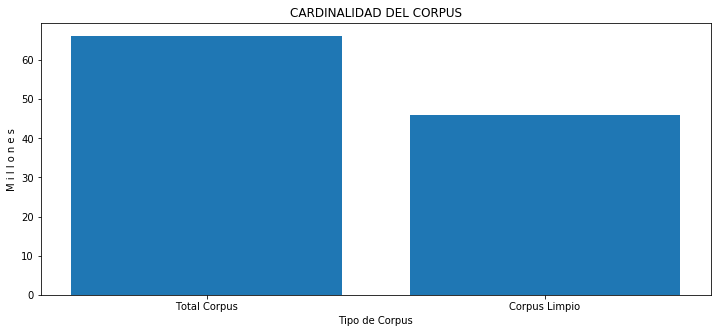

In [25]:
# Graficamos el tamano del corpus sin procesar stopwords y elimanados los stopwords\n", para sacar una comparacion de la efectividad del proceso

# como podemos ver el tamao real del corpus de de mas de 60.000.000 de palabras a procesar, pero despues de realizar la limpieza de Stop Words 
# consiguiendo una reduccion de mas de 20.000.000 de palabras que no aportan valor al analisis
import matplotlib as mpl
corpusLabelTxt = ['Total Corpus','Corpus Limpio']
corpusValores = [longCorpus/1000000, longCorpusSw/1000000]
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('CARDINALIDAD DEL CORPUS')
ax.set_ylabel('M i l l o n e s')
ax.set_xlabel('Tipo de Corpus')
#ax.set_xticklabels(corpusTxt, rotation=90)
plot = ax.bar(corpusLabelTxt, corpusValores)
plt.show()


In [26]:
from collections import Counter
frecuenciasPalabras = Counter(corpusLimpio.split())
palabrasMasComunes = frecuenciasPalabras.most_common(25)
palabras = [w[0] for w in palabrasMasComunes]
frequencia = [w[1] for w in palabrasMasComunes]

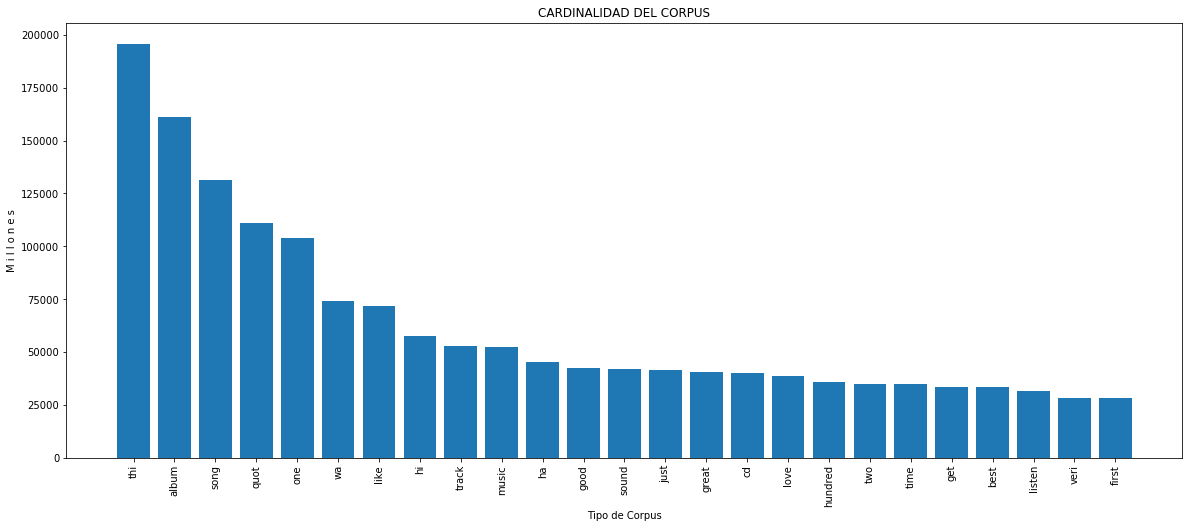

In [27]:
# Ahora graficamos los 25 palbras mas relevantes con sus frecuencias respectivas 
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('CARDINALIDAD DEL CORPUS')
ax.set_ylabel('M i l l o n e s')
ax.set_xlabel('Tipo de Corpus')
ax.set_xticklabels(palabras, rotation=90)
plot = ax.bar(palabras, frequencia)
plt.show()

### Reviews por numero de Estrellas

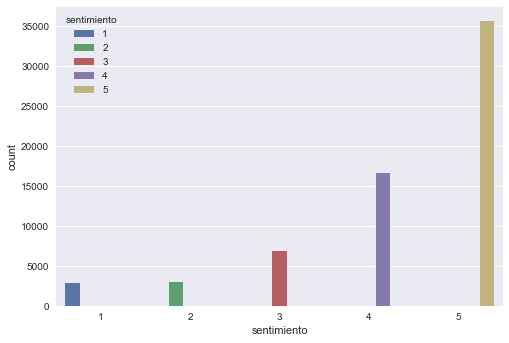

In [28]:
# Graficamos nuestro Corpus por el numero de Estrellas
# Donde podemos obervar que la mayoria de Reviews son positivos

# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
#dfCb = dfCb[dfCb[\"TIPO_USADO\"] != 'NO DATA']
sns.countplot(x='sentimiento',
             data=df,
             hue='sentimiento')
plt.show()

### Calificaciones Positivas y Negativas
0 = Negativo 1 = Positivo

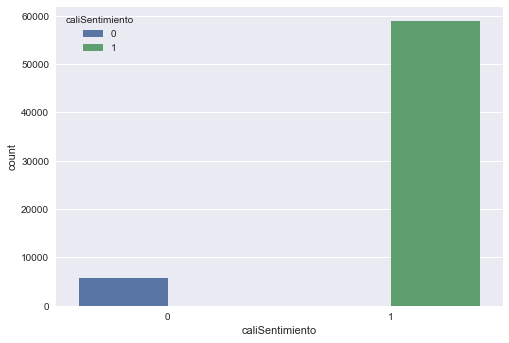

In [29]:
# Aqui podemos ver que la Mayoria de los revies son Positivos, donde podemos observar que mas del 90% de los reviews son positivos
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
sns.countplot(x='caliSentimiento',
             data=df,
             hue='caliSentimiento')
plt.show()

### N-grams más frecuentes

Un Dato importante es que cuando solo analizamos palaras sueltas estas no nos aportan una idea c;ara de que es lo que mas se esta hablando en el Corpus
Para esto vamos a crear N
N-Grams de 2 y 3 palabras y analizar su frecuencia

In [30]:

from nltk import ngrams
from nltk.probability import FreqDist

In [31]:
words_nltk = corpusLimpio.lower().split()
bigrams_ = list(ngrams(words_nltk, 2))
bigrams_[:10]

[('hard', 'believ'),
 ('believ', 'memori'),
 ('memori', 'tree'),
 ('tree', 'came'),
 ('came', 'eleven'),
 ('eleven', 'year'),
 ('year', 'ago'),
 ('ago', 'ha'),
 ('ha', 'held'),
 ('held', 'well')]

In [32]:
# Calculamos la Frecuencia de cada palabra
bg_freq = FreqDist(bigrams_)
bg_freq.most_common(10)

[(('thi', 'album'), 46637),
 (('nine', 'hundred'), 20908),
 (('thousand,', 'nine'), 19997),
 (('one', 'thousand,'), 19828),
 (('thi', 'cd'), 14972),
 (('quot', 'quot'), 12321),
 (('thi', 'one'), 12228),
 (('thi', 'song'), 10987),
 (('sound', 'like'), 7409),
 (('two', 'thousand'), 7073)]

In [33]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))

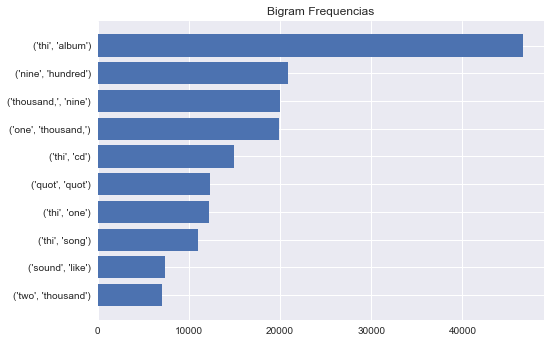

In [34]:
# Graficamos en barras para ver su frecuencia de los bi-gramas
# asi podemos ver que la palbra Thi Album es la que mas se repite
plt.barh(bgs_, bgs_f_)
plt.title('Bigram Frequencias')
plt.show()

### Word Cloud
Finalmente graficamos las frecuencias de los bigramas en un Word cloud para ver de forma grafico el peso que tienen ciertas palbras con respecto 
a otras frases

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(' '.join(text))
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

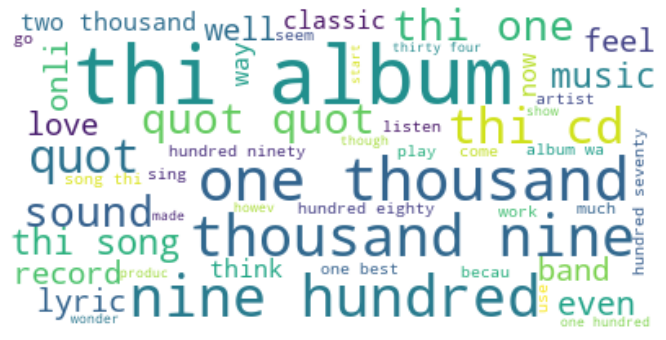

In [38]:
words_list = corpusLimpio.lower().strip().split()
plot_word_cloud(words_list)

## Conclusiones

Con este breve analisis podemos ver rapidamente, visualmente, como esta compuesto nuestro Corpus y poder ir tomando acciones sobre la misma
El uso de Bi-gramas es mas efectivo que solo palanras sueltas para entender nuestro Corpus